In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/Users/jhajhajhajha1/Desktop/Hanyang Data/data_playaround.csv')

In [3]:
data = dataset.iloc[:, 0:19]

In [49]:
print(len(data))
data[1000:1010]

46858


,W_ZONE,no_hh,no_hh_chil,hh_type,hh_income,no_car,age,sex,job_type,house_lat,house_lon,work_lat,work_lon,H_ZONE,H_ZONE_X,H_ZONE_Y,W_ZONE_X,W_ZONE_Y,0
1000,88,4.0,3.0,1.0,5.0,1.0,40.0,1.0,4.0,37.511534,126.902390,37.031954,127.077127,954.0,191000.0,445000.0,207000.0,393000.0,25940.567472
1001,88,3.0,3.0,4.0,2.0,2.0,61.0,1.0,6.0,37.000396,127.106922,37.034933,127.078710,50.0,209000.0,389000.0,207000.0,393000.0,25940.567472
1002,88,5.0,3.0,1.0,4.0,1.0,46.0,1.0,4.0,37.195733,127.034267,37.039019,127.077925,287.0,203000.0,411000.0,207000.0,393000.0,25940.567472
1003,88,4.0,4.0,2.0,6.0,1.0,49.0,1.0,6.0,37.067362,127.056343,37.037719,127.077653,130.0,205000.0,397000.0,207000.0,393000.0,25940.567472
1004,88,4.0,2.0,1.0,3.0,1.0,37.0,1.0,4.0,37.151695,127.078077,37.039019,127.077925,218.0,207000.0,405000.0,207000.0,393000.0,25940.567472
1005,88,3.0,3.0,1.0,5.0,1.0,56.0,1.0,6.0,37.053694,127.047655,37.038303,127.082699,105.0,205000.0,395000.0,207000.0,393000.0,25940.567472
1006,88,3.0,3.0,4.0,6.0,1.0,55.0,1.0,6.0,37.102160,127.021462,37.036618,127.077674,173.0,201000.0,401000.0,207000.0,393000.0,25940.567472
1007,88,4.0,4.0,2.0,5.0,1.0,41.0,1.0,6.0,37.037146,127.029241,37.035418,127.074294,86.0,203000.0,393000.0,207000.0,393000.0,25940.567472
1008,88,1.0,1.0,2.0,4.0,1.0,49.0,1.0,6.0,37.076516,127.064009,37.036774,127.072348,130.0,205000.0,397000.0,207000.0,393000.0,25940.567472
1009,88,3.0,3.0,1.0,5.0,1.0,43.0,1.0,6.0,36.989866,127.090719,37.037373,127.088846,35.0,209000.0,387000.0,207000.0,393000.0,25940.567472


In [59]:
# preprocessing

# not calculating distance, simply using latitude
x = data.iloc[:, 0:13]
x = x.drop(["house_lat", "house_lon"], axis= 1)
x.head()

,W_ZONE,no_hh,no_hh_chil,hh_type,hh_income,no_car,age,sex,job_type,work_lat,work_lon
0,0,4.0,4.0,1.0,5.0,1.0,41.0,1.0,4.0,36.115620,126.792747
1,0,3.0,3.0,2.0,3.0,1.0,36.0,1.0,4.0,37.335447,126.677584
2,0,3.0,3.0,2.0,2.0,1.0,70.0,1.0,9.0,36.975082,127.436894
3,0,5.0,4.0,1.0,5.0,1.0,32.0,1.0,4.0,36.847868,127.414170
4,0,2.0,2.0,4.0,3.0,1.0,55.0,1.0,4.0,37.967527,124.717824


In [51]:
x.isnull().sum()

W_ZONE          0
no_hh         180
no_hh_chil    180
hh_type       180
hh_income     180
no_car        180
age           180
sex           180
job_type      180
work_lat      180
work_lon      180
dtype: int64

In [62]:
# # Taking care of missing data
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(x.iloc[:, 1:10])
# x.iloc[:, 1:10] = imputer.transform(x.iloc[:, 1:10])
x = x.dropna()

In [85]:
x.isnull().sum()
x.groupby('hh_type').nunique()

,W_ZONE,no_hh,no_hh_chil,hh_type,hh_income,no_car,age,sex,job_type,work_lat,work_lon
hh_type,,,,,,,,,,,
1.0,1326,8,8,1,8,2,66,2,9,15391,15422
2.0,732,7,7,1,8,2,62,2,8,3594,3605
3.0,648,6,6,1,8,2,58,2,9,3210,3214
4.0,1120,7,6,1,8,2,60,2,7,6152,6173
5.0,246,6,5,1,7,2,50,2,7,567,566
6.0,93,6,5,1,6,2,47,2,6,123,123


In [86]:
# category values: hh_type, hh_income (this one is fine because of the levels)
# Encoding categorical data
# encode variable: hh_type, sex, job_type, W_Zone

# make X a numpy array of x
X = x.values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# W_Zone
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
# Dummy Variable trap
X = X[:, 1:]

# hh_type
labelencoder_X = LabelEncoder()
X[:, 1565] = labelencoder_X.fit_transform(X[:, 1565])
onehotencoder = OneHotEncoder(categorical_features = [1565])
X = onehotencoder.fit_transform(X).toarray()
# Dummy Variable trap
X = np.delete(X, 1565, axis=1)

# job_type
labelencoder_X = LabelEncoder()
X[:, 1574] = labelencoder_X.fit_transform(X[:, 1574])
onehotencoder = OneHotEncoder(categorical_features = [1574])
X = onehotencoder.fit_transform(X).toarray()
# Dummy Variable trap
X = np.delete(X, 1574, axis=1)

In [87]:
len(X[1200])

1585

In [90]:
y = data.loc[:, ["house_lat", "house_lon"]]
y.head()

,house_lat,house_lon
0,37.453952,126.716877
1,37.465845,126.717234
2,37.229621,127.284122
3,37.623500,127.083187
4,37.469676,126.644354


In [91]:
y.isnull().sum()

house_lat    180
house_lon    180
dtype: int64

In [92]:
# # Taking care of missing data
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(y)
# y = imputer.transform(y)
y = y.dropna()
Y = y.values
Y

array([[ 37.453952, 126.716877],
       [ 37.465845, 126.717234],
       [ 37.229621, 127.284122],
       ...,
       [ 38.105379, 127.204076],
       [ 38.129228, 127.225464],
       [ 38.184626, 127.10823 ]])

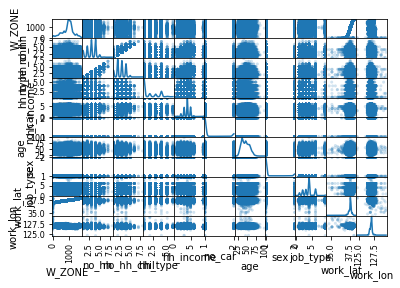

In [13]:
# visualize variables
from pandas.plotting import scatter_matrix
scatter_matrix(x, alpha = 0.2, diagonal = 'kde')
plt.show()

In [93]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [94]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [95]:
# Random Forest Regression
# Fitting the Random Forest Regression Model to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [96]:
y_pred = regressor.predict(X_test)

In [98]:
prediction = pd.DataFrame({'house_lat': y_test[:, 0],'house_lon':y_test[:, 1],
                            'house_lat (pred)': y_pred[:,0], 'house_lon (pred)': y_pred[:,1]})

In [99]:
# accuracy based on distance
def accuracy(pred):
    sum_error = 0
    for i in range(len(pred)):
        deltax = pred.iloc[i][0]-pred.iloc[i][2]
        deltay = pred.iloc[i][1]-pred.iloc[i][3]
        error = (deltax**2 + deltay**2)**(0.5)
        sum_error += error
    return sum_error

def ind_diff(pred):
    diff = []
    for i in range(len(pred)):
        deltax = pred.iloc[i][0]-pred.iloc[i][2]
        deltay = pred.iloc[i][1]-pred.iloc[i][3]
        error = (deltax**2 + deltay**2)**(0.5)
        diff.append(error)
    return pd.DataFrame({'Difference': diff})


In [100]:
accuracy(prediction)

823.1777371486922

In [101]:
prediction.head()

,house_lat,house_lon,house_lat (pred),house_lon (pred)
0,37.607582,127.348879,37.520099,127.442859
1,37.594757,127.153212,37.619830,127.119677
2,37.514340,127.062632,37.512968,127.040396
3,37.469662,126.701077,37.349974,127.018540
4,37.440188,126.798281,37.291215,127.005598


In [102]:
difference = ind_diff(prediction)

In [103]:
difference.head()

,Difference
0,0.128396
1,0.041872
2,0.022279
3,0.339276
4,0.255290


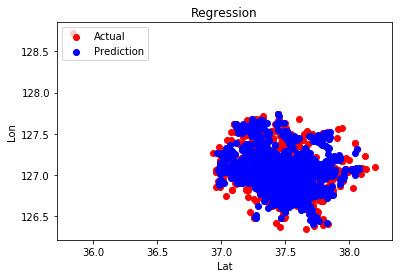

In [105]:
plt.scatter(y_test[:, 0], y_test[:, 1], color = "red", label = 'Actual')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color = "blue", label = 'Prediction')
plt.title('Regression')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.legend(loc='upper left')
plt.show()

In [25]:
# SVR
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

Svr = SVR(kernel = 'rbf')
regressor = MultiOutputRegressor(Svr)
regressor.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
           n_jobs=1)

In [26]:
y_pred = regressor.predict(X_test)

In [27]:
prediction = pd.DataFrame({'house_lat': y_test.iloc[:, 0],'house_lon':y_test.iloc[:, 1],
                            'house_lat (pred)': y_pred[:,0], 'house_lon (pred)': y_pred[:,1]})

In [28]:
accuracy(prediction)

895.4992967112057

In [29]:
difference = ind_diff(prediction)

In [30]:
difference.head()

,Difference
0,0.096250
1,0.121615
2,0.029366
3,0.384996
4,0.262974


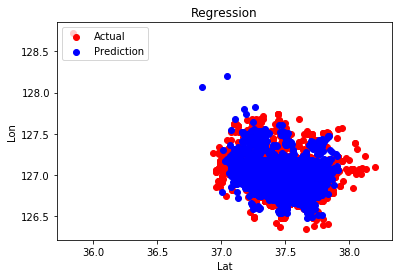

In [31]:
plt.scatter(y_test.iloc[:, 0], y_test.iloc[:, 1], color = "red", label = 'Actual')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color = "blue", label = 'Prediction')
plt.title('Regression')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.legend(loc='upper left')
plt.show()

In [32]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [123]:
# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 1585))
regressor.add(Dropout(0.1))

# Adding the second hidden layer
regressor.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dropout(0.1))

# Adding the third hidden layer
regressor.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 2, kernel_initializer = 'normal', activation = 'linear'))

# Compiling the ANN
regressor.compile(optimizer = 'adam', loss = 'logcosh', metrics = ['mae'])
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                25376     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 66        
Total para

In [ ]:
regressor.fit(X_train, y_train, batch_size = 10, epochs = 270)

Epoch 1/270
37342/37342 [==============================] - 5s 139us/step - loss: 9.5631 - mean_absolute_error: 10.2121
Epoch 2/270
37342/37342 [==============================] - 5s 129us/step - loss: 5.9478 - mean_absolute_error: 6.5861
Epoch 3/270
 7290/37342 [====>.........................] - ETA: 4s - loss: 5.3503 - mean_absolute_error: 5.9817

In [109]:
y_pred = regressor.predict(X_test)

In [118]:
np.shape(X_test)

(9336, 1585)

In [111]:
prediction = pd.DataFrame({'house_lat': y_test[:, 0],'house_lon':y_test[:, 1],
                            'house_lat (pred)': y_pred[:,0], 'house_lon (pred)': y_pred[:,1]})

In [112]:
len(y_pred)

9336

In [113]:
accuracy(prediction)

2028.2127447519092

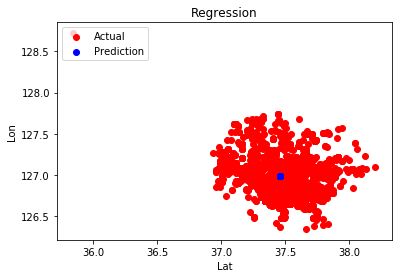

In [115]:
# plot?
plt.scatter(y_test[:, 0], y_test[:, 1], color = "red", label = 'Actual')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color = "blue", label = 'Prediction')
plt.title('Regression')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.legend(loc='upper left')
plt.show()

In [121]:
prediction.head()

,house_lat,house_lon,house_lat (pred),house_lon (pred)
0,37.607582,127.348879,37.463493,126.988358
1,37.594757,127.153212,37.463493,126.988358
2,37.514340,127.062632,37.463493,126.988358
3,37.469662,126.701077,37.463493,126.988358
4,37.440188,126.798281,37.463493,126.988358


In [122]:
np.mean(prediction)

house_lat            37.494552
house_lon           126.964716
house_lat (pred)     37.463493
house_lon (pred)    126.988358
dtype: float64